## ASTR 21000, Winter 2020

## Homework Assignment 3 (60 points points)

### Distributed: Tuesday, February 11

### Due: Friday,  Feb 21 at 11:59pm 

#### Exercises you need to do for the assignment grade are tasks in Exercises 1 and 2 along with relative difficulty of each task in the exercise denoted by associated points

#### Please submit you notebook (i.e. its *.ipynb file) as an attachment via Canvas. You can also attach other files, if needed to your submission. Make sure that all of the cells in the notebook have output that you want, when you run all cells just before the submission


#### Jupyter notebooks with class notes and assignments: https://github.com/a-kravtsov/a211w20

#### Slack workspace for this class: https://a211w20.slack.com


import packages needed by the codes below. Run this cell first before using these codes. 

In [34]:
import numpy as np

# use jupyter "magic" command to tell it to embed plot into the notebook 
import matplotlib.pyplot as plt
%matplotlib inline

from codes.plot_utils import plot_pretty
plot_pretty(fontsize=12)

### Exercise 1: 1D and 2D histograms of data. (20 points)

**Background.** I introduced the issue of choosing histogram bin width in class and you can find heuristic criteria and objective methods (Shimazaki-Shinomoto method and Knuth method) of estimating the bin width (or, equivalently, the number of bins for a given range of data) in the notebook <a href="04_histograms.ipynb"><tt>04_histograms.ipynb</tt></a>. 

In that notebook I used the heavy element abundances of globular clusters in our Milky Way galaxy to illustrate that the structure in that distribution (in particular two peaks, or, "modes" in the distribution) is likely not real, because when histogram is constructed with the 6-8 bins suggested objective methods, no two peaks are apparent. 

In this exercise, you will explore how these criteria and methods work in another specific application: distribution of colors of galaxies. For this, you will first get your sample of galaxies from the Sloan Digital Sky Survey (SDSS) data bases, as described in the companion <a href="hw03_background_sdss.ipynb"><tt>hw03_background_sdss.ipynb</tt></a> notebook. 

### What you are learning in this exercise

* To use basic SQL commands to query an astronomical data base.
* How to use objective criteria to estimate bin width and the number of bins to be used in a histogram. 
* How to evaluate whether certain features in the distribution of some quantity are real or not.   

**Task 1a. (5 points)** Acquire SDSS galaxy sample, as described in <a href="hw03_background_sdss.ipynb"><tt>hw03_background_sdss.ipynb</tt></a> notebook. Run the cells below and construct the histogram using the plotting routine, as shown. 

Note that you can pass the number of bins as an integer to the routine via <tt>bins</tt> parameter. Plot histogram of $g-r$ colors of galaxies for different number of bins and note and briefly describe any changes in the appearance of the histogram. (2 points)

You can also pass string options that are accepted by the <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html"><tt>numpy.histogram</tt></a> routine: <tt>'auto', 'sturges', 'fd', 'scott', 'rice', 'sqrt'.</tt> The meaning of these options and the heuristic models for bin number or bin width these correspond to is explained in the <a href="04_histograms.ipynb"><tt>04_histograms.ipynb</tt></a> notebook. Explore how the histogram changes when each of these options is used and briefly describe your results. (3 points)

In [35]:
from astropy.io import fits

hdulist = fits.open('data/sdss_galaxies.fits') 

# data table in the FITS is a dictionary, which we will convert to the numpy dictionary (record)
data = np.asarray(hdulist[1].data)

In [36]:
# this will give us names of columns and their data types
print(data.dtype)

(numpy.record, [('objid', '>i8'), ('ra', '>f8'), ('dec', '>f8'), ('g', '>f4'), ('r', '>f4'), ('z', '>f4')])


Data in dictionaries can be accessed by the name of the corresponding variable. For example, we can subselect indices of data that satisfied a set of constraints as follows

In [95]:
zmin, zmax = 0.01, 0.14
rmin, rmax = 12, 17.77
isel = ((data['r'] > rmin) & (data['r'] < rmax) & (data['z'] > zmin) & (data['z'] < zmax))

In astronomy, the different of apparent magnitudes of an object measured in different filters is called "color," in analogy with how our eye converts brightness of light in different parts of the visible spectrum into perceived color. Here we will define $g-r$ color as the different of apparent magnitudes of galaxies in our sample in the $g$ and $r$ filters. 

In [96]:
# g-r color of all galaxies in the selected subsample
mr = data['r'][isel]
gr = data['g'][isel] - data['r'][isel]

In [97]:
print(np.size(gr))
print(gr.min(), gr.max())

71860
-0.5248871 3.274603


In [98]:
print(data['objid'])

[1237648720173138004 1237648720173138136 1237648720173138144 ...
 1237660670342857127 1237660670342857142 1237660670342988181]


You can use the <tt>objid</tt> field for a specific galaxy to look at its image. Go to <a href="http://skyserver.sdss.org/dr13/en/tools/explore/Summary.aspx?#">this page</a> of the SDSS server and copy and paste integer of specific <tt>objid</tt> into ObjID field and click Go button for this field. You will be shown database infornation for the object corresponding to that ObjID including its image and spectrum. 

You can select some random objects correponding to different ranges of $g-r$ color and look at their images and spectra in the database to get a sense for how image or spectrum looks like for a given color. 

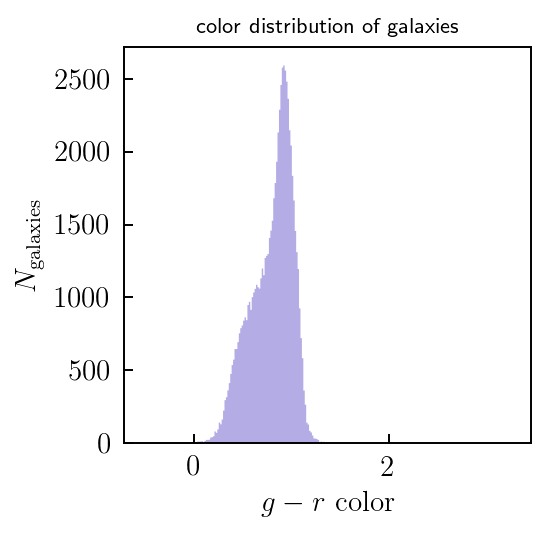

In [99]:
from codes.plot_utils import plot_histogram 
plot_pretty(fontsize=12)

plot_histogram(gr, bins='fd', xlabel=r'$g-r\ \rm color$', ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color distribution of galaxies', figsize=3.0)

**Task 1b.** (5 points) Change the sample selection below by making redshift range (<tt>zmin, zmax</tt>) and/or range of $r$-band magnitude (<tt>rmin, rmax</tt>) narrower and centered on different values. Using <tt>bins='scott'</tt> for the binning, find a combination of ranges for which the distribution starts to look significantly different from that in 1a. 

In particular, for some choices it may reveal a new type of structure in the distribution with two distinct peaks. To identify where this happens, it may help to examine the distribution of colors in the $m_r-(g-r)$ plane. To do this, the code below uses routine, which in turn uses <a href="">numpy.histogram2d</a> and the Matplotlib's <tt>colormesh</tt> routine we used before to plot $d_L$ in the $\Omega_{\rm m0}-\Omega_\Lambda$ plot.  Look for ranges of $m_r$ in the distribution where more interesting structure is present. 

Briefly describe your exploration and results and show the final plot for which the distribution differs significantly and selection criteria that were used to subselect galaxies in that case. 


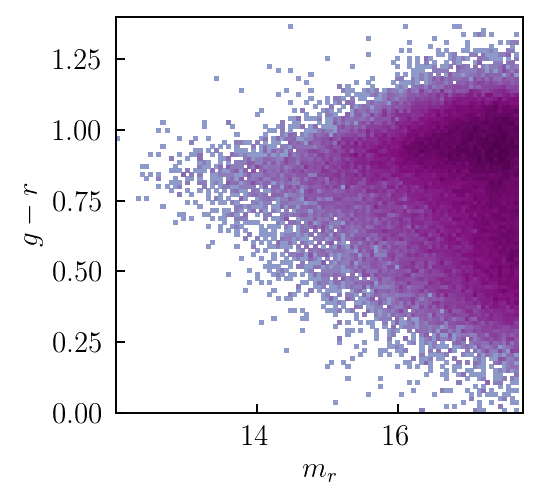

In [100]:
from codes.plot_utils import plot_2d_dist

plot_2d_dist(mr, gr, xlim=[mr.min(), mr.max()], ylim=[0, 1.4],
             nxbins=100, nybins=100, 
             xlabel=r'$m_r$', ylabel=r'$g-r$', figsize=(3,3))

**Task 1c** (5 points). Given the lesson from binning metallicities of globular clusters in <a href="04_histograms.ipynb"><tt>04_histograms.ipynb</tt></a>, which showed that structure in the distribution may not real, check whether it is still present if the number of bins is estimated using the The Shimazaki-Shinomoto method and Knuth method. Examples of their use can be found in the <a href="04_histograms.ipynb"></a> and their usage for this case is shown in the cells below. Report your results and briefly describe your conclusions. 

In [ ]:
from codes.histtools import shimazaki_shinomoto_rule

nss, hss = shimazaki_shinomoto_rule(gr, Nbmin=4, Nbmax=500)

print("number of bins according to Shimazaki-Shinomoto method is %d"%nss)

In [ ]:
from codes.histtools import knuth_bin_width

h_knuth, bins_knuth = knuth_bin_width(gr, return_bins=True)

n_knuth = np.shape(bins_knuth)[0] - 1
print("number of bins according to Knuth method is %d"%n_knuth)

In [ ]:
from codes.plot_utils import plot_histogram 
plot_pretty(fontsize=12)

plot_histogram(gr, bins=n_knuth, xlabel=r'$g-r\ \rm color$', ylabel=r'$N_{\rm galaxies}$', 
               plot_title='color distribution of galaxies', figsize=3.0)

**Task 1d.** (5 points). Based on what you learned from material in <a href="04_histograms.ipynb"><tt>04_histograms.ipynb</tt></a> and in the exercises above, think about, develop, and describe a rough heuristic argument to guide the choice of number of bins in each dimension for a 2-dimensional histogram. Apply the rule you developed to the histogram of galaxies in the $m_r-(g-r)$ plane suggested in the Task 1b above and show the corresponding plot (3 points). 

Finally, using the galaxy coordinates <tt>xgal</tt> and <tt>ygal</tt> computed as shown below, plot distribution of galaxies as 2d histogram using routine <tt>plot_2d_dist</tt>, instead of plotting each galaxy as a point, as in the code below. Discuss whether the rule you developed for the number of bins for choosing the number of bins produce reasonable results in this case as well? (2 points). 

In [ ]:
from codes.constants import clight 

H0 = 70. 
d_C = clight * data['z'] / H0 # approximate calculation of comoving distance using Hubble law

# conversion of sky coordinates in x-y coordinates. all galaxies are assumed to have the same dec
# for visualization purposes
ygal = d_C * np.cos(data['ra'] * np.pi / 180.)
xgal = d_C * np.sin(data['ra'] * np.pi / 180.)


In [ ]:
figx = 3.
xmin, xmax = -400.,  300.
ymin, ymax = -400., -150.


fxy = np.abs(ygal.max()-ygal.min()) / np.abs(xgal.max() - xgal.min())
figy = figx  * fxy

plot_pretty(fontsize=12)
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(figx,figy))
plt.xlim([xmin, xmax]); plt.ylim([ymin, ymax])

ax.scatter(xgal, ygal, s=0.2, lw=0, c='b')

plt.show()

### Exercise 2: using $\tilde{d}_L$ approximation and supernova type Ia sample to measure the average density of matter and vacuum energy in our Universe (40 points)

In this exercise you will be putting the approximation for the luminosity distance $\tilde{d}_L$ that you developed in the exercise 2 of homework 2 to use to obtain information about parameters of $\Omega_{\rm m0}$ and $\Omega_\Lambda$ that are consistent with existing observations of type Ia supernovae. First a recap of the model. 

#### Group work

This is aomewhat "open-ended" exercise of the kind that is often encountered in research. 
You are expected to work on this exercise in a group, although group assignment will be different from homework 2 (see announcement). 

Try to work collaboratively. You can split the various parts of the task among group members and then combine your work, or do this independently and then discuss your findings among your group and reach consensus conclusion. Use in-person meetings or slack messaging (you can create your own private or public channel for these discussions).  Each member of the group should submit results of their and group work in their own notebook via Canvas.

**Background.** During the last couple of weeks you were working on constructing accurate approximations for $\tilde{d}_L(z,\Omega){\rm m0},\Omega_\Lambda)$ related to the luminosity distance as $d_L=c/H_0\,\tilde{d}_L(z,\Omega_{\rm m0}, \Omega_\Lambda)$

As discussed before, the *distance modulus* predicted by a cosmology model with a given values of $H_0$, $\Omega_{\rm m0}$, $\Omega_\Lambda$ is 

$$\mu(z,\Omega_{\rm m0},\Omega_\Lambda) = m-M = 5\log_{10}d_L + 25 = 5\log_{10}\frac{c}{H_0}\,\tilde{d}_L + 25 =5\log_{10}\tilde{d}_L(z,\Omega_{\rm m0},\Omega_\Lambda) + 5\log_{10}c - 5\log_{10}H_0 + 25$$

When apparent magnitude at the time of peak brightness, $m_{\rm SNIa}$, and redshift, $z$, is measured for a supernova type Ia in observations, and if we assume that all such supernovae have the same *intrinsic* luminosity at peak brightness, the observational estimate of their distance modulus can be written as 

$$\mu_{\rm obs} = m_{\rm SNIa} - M_0, $$

where $M_0$ is the absolute magnitude of the supernova at peak brightness that we assume to be the same for all supernovae of this type (i.e. $M_0=\rm const$). 

A difference between observational estimate, $\mu_{\rm obs}$ and model prediction $\mu(z,\Omega_{\rm m0},\Omega_\Lambda)$, where $z$ is the observed redshift of the supernova then can be written as 

\begin{eqnarray}
\Delta\mu=\mu_{\rm obs} - \mu(z,\Omega_{\rm m0},\Omega_\Lambda) &=&m_{\rm SNIa} - M_0 - 5\log_{10}\tilde{d}_L(z,\Omega_{\rm m0},\Omega_\Lambda) - 5\log_{10}c + 5\log_{10}H_0 - 25=\\ 
&=& m_{\rm SNIa}- 5\log_{10}\tilde{d}_L(z,\Omega_{\rm m0},\Omega_\Lambda) -  \left(M_0 + 5\log_{10}\,\frac{c}{H_0}+25\right)=\\
&=& m_{\rm SNIa} - 5\log_{10}\tilde{d}_L(z,\Omega_{\rm m0},\Omega_\Lambda) - \tilde{M}_0, 
\end{eqnarray}

where 

$$ \tilde{M}_0 = \left(M_0 + 5\log_{10}\,\frac{c}{H_0}+25\right).$$

In principle, $M_0$ and $H_0$ are quantities that could be measured for objects that have independent distance measurements. One of the key areas of modern astronomy are efforts to do just that. However, in this analysis we will assume that we don't know $M_0$ and $H_0$ with enough accuracy to keep them at constant values and will consider their combination $\tilde{M}_0$ as a free parameter. Parameter $\tilde{M}_0$ is not interesting to us itself because it is not a specific interesting parameter, but a combination of two interesting parameters that we cannot differentiate in this analysis. Such parameters in statistics are aptly called *nuisance parameters*. We will need to model it, but in the end we will not be particularly interested in its value. It is the mean density of mass and vacuum energy in the  the Universe, $\Omega_{\rm m0}$ and $\Omega_\Lambda$, that we want to constrain. 

Thus, with these assumptions $\Delta\mu$ depends on 3 model parameters: $\Omega_{\rm m0}$, $\Omega_\Lambda$, and $\tilde{M}_0$. 

**Background: using $\chi^2$ to derive parameter constraints.** When we have many supernovae measurements in a sample $\{m_{i,\rm obs}\}$ and $\{z_{i}\}$, where $i=0,\ldots,N_{\rm SN}-1$, we will use $\chi^2$ statistic to deerive constraints on model parameters: 

$$\chi^2 = \sum\limits_{i=0}^{N_{\rm SN}-1}\, \frac{\Delta\mu_i^2}{\sigma_{\rm \Delta\mu,i}^2},$$

where $\sigma_{\rm \Delta\mu,i}$ is the uncertainty of the $\Delta\mu_i$ measurement and 

$$\Delta\mu_i = m_{i,\rm SNIa} - 5\log_{10}\tilde{d}_L(z_i,\Omega_{\rm m0},\Omega_\Lambda) - \tilde{M}_0.$$

If we neglect uncertainty in the redshift measurement $z_i$ that is much smaller than the uncertainty in $m_{i,\rm SNIa}$ and other uncertainties in the model, uncertainty $\sigma_{\rm \Delta\mu,i}=\sigma_{m,i}$ where $\sigma_{m,i}$ is uncertainty of the measured apparent magnitude, $m_{i,\rm SNIa}$. 

Thus, for observed sample of supernovae we need redshifts, and measurements of the apparent magnitude with their uncertainties. Given these and approximation for model $\tilde{d}_L(z_i, \Omega_{\rm m0}, \Omega_\Lambda)$ we can compute $\chi^2$ using equation above for different values of $\Omega_{\rm m0}$, $\Omega_\Lambda$, and $\tilde{M}_0$.
We will use this ability to compute a 3D "map" of $\chi^2(\Omega_{\rm m0}, \Omega_\Lambda, \tilde{M}_0)$, find the combination of the 3 parameters that minimizes $\chi^2$ and use the map to draw iso-$\chi^2$ contours corresponding to "confidence regions" of the model parameter estimates.

**Reduced $\chi^2$:** once we estimate $\chi^2$ as a function of parameter values, we can find its minimum value within the specified model parameter ranges: $\chi^2_{\rm min}$. Finding this minimum is an example of the *optimization problem*. In this exercise, you will do this in two ways: "brute-force" search that is quite feasible in 3D space of 3 parameters and using one of the SciPy's optimization routines. 

Once $\chi^2_{\rm min}$ is estimated, we can evaluate how well or three parameter model describes supernova measurements using the "goodness-of-fit" statistic called <a href="https://en.wikipedia.org/wiki/Reduced_chi-squared_statistic">*reduced $\chi^2$*</a> or $\chi^2_\nu=\chi^2/(N_{\rm SN}-\nu)$, where $\nu$ is the number of model parameters, or $\nu=3$ in our case, and $N_{\rm SN}=740$ for this sample. 


### Observational sample of supernovae type Ia

We will use a combined sample of 740 supernovae type Ia assembled and published in a study of 
<a href="https://ui.adsabs.harvard.edu/abs/2014A%26A...568A..22B/abstract">Betoule et al. (2014)</a>. The file containing the sample is available in the course repository and was downloaded from <a href="http://supernovae.in2p3.fr/sdss_snls_jla/ReadMe.html">here</a>.

In [45]:
from codes.read_data import read_jla_data

# you may need to change slash in the file name below on your system
# read vectors of redshifts, apparent magnitude in B-band, mB, and its uncertainty emB:
zCMB, mB, emB = read_jla_data(sn_list_name = 'data/jla_lcparams.txt')

print("read sample of %d supernovae..."%(np.size(zCMB)))

read sample of 740 supernovae...


**Task 2a. (20 points)** In homework 2, you constructed approximation for $\tilde{d}_L(z,\Omega_{\rm m0},\Omega_\Lambda)$ as a function of $\Omega_{\rm m0}$ and $\Omega_\Lambda$ for a fixed $z$ using a 2D grid of <tt>ntrx x ntry</tt> training points, where <tt>ntr, ntry</tt> are the smallest number of training points guaranteeing the target accuracy. For this  exercise, you need to construct such 2D approximation tables for $740$ redshifts of the supernovae in the sample. 

Thus, using the best choices you've identified in hw 2, arrange for a loop that goes over supernova redshifts and for each redshift $z_i$ constructs spline or polynomial (whichever you concluded was best) approximation for $\tilde{d}_L(z_i,\Omega_{\rm m0},\Omega_\Lambda)$ on an <tt>ntrx x ntry</tt> grid of the training points. <tt>ntrx, ntry</tt> and the size of the grid and training points should be the same for all redshifts. 

Put your approximations in a 3D array, the first dimension of which has size equal to the number of supernovae, while the other two dimensions have sizes of <tt>ntrx, ntry</tt> (**10 points**). The code below shows an outline of one possible way of how this can be done, but feel free to do it in a different way that may be more natural to you. You can arrange 
construction of this approximation in the hw 2 notebook, which may be more convenient and then transfer resulting array to this notebook using the pickle module, as described at the end of this notebook. 

If you will not be able to construct this approximation, please contact instructor for guidance. Depending on the degree of the issue, approximation may be provided to you to proceed with the rest of this exercise. 

In [94]:
# assuming Om0tr, OmLtr are vectors of training points for Om0 and OmL
nOm0, nOmL = np.size(Om0tr), np.size(OmLtr)
ntrx, ntry = nOm0, nOmL

dLz = []

for iz, zi in enumerate(zCMB):
    #construct approximation for tilde(d)_L(z_i, Om0, OmL)
    dLgrid = np.empty((nOm0, nOmL))
    for i, Omd in enumerate(Om0tr):
        for j, Omld in enumerate(OmLtr):
            # compute tilde{d}_L for zi, Omd, OmL0 and place it in
            #dLgrid[i,j] 
    # use Om0tr, OmLtr, dLgrid to construct approximation, as in hw 2
    # this will give you either spline object, say, d_l_spl or vector of polynomial coefficients a, record it in dLz
    #dLz.append(d_l_spl) or dLz.append(a)
    
# by the end of this you should have a list of N_SN = np.size(zCMB) approximations
# you can convert it from list to numpy array if needed as
# dLz = np.asarray(dLz)

SyntaxError: unexpected EOF while parsing (<ipython-input-94-619fd33d0ca5>, line 20)

Write a routine that has input parameters $\Omega_{\rm m0}$, $\Omega_\Lambda$, $\tilde{M}_0$ values and computes $\chi^2$ using the list of approximations prepared via the procedure outlined above. (**10 points**)

    def chi2(Omega0, OmegaL, tM0): 
        """
        compute chi^2 using provided equation by summing overall all SNe using 
        approximations for tilde{d}_L described above
        """

**Task 2b (5 points).**  Define three vectors of uniformly spaced values for parameters $\Omega_{\rm m0}$, $\Omega_\Lambda$, $\tilde{M}_0$ of some specified size, which should be considerably larger than the size of the training sample used to construct approximation (say 100). Note that the range of values for  $\Omega_{\rm m0}$ and $\Omega_\Lambda$ should be the same as the range for which you constructed $\tilde{d}_L$ approximation to avoid extrapolation. $M_0$ for SN type Ia is close to $-19.1$, so you can set $H_0=70.$ and define a range for $\tilde{M}_0$ by varying $M_0$ from say $-18.6$ to $-19.6$. 

Define a 3D array for $\chi^2$ values with dimensions corresponding to these three parameter vectors. 
Arrange a triple loop over the values in these vectors to fill the $\chi^2$ array using the routine you implemented in Task 2a. Find the grid point that corresponds to the minimum value of $\chi^2$ and print out its indices, the corresponding $\Omega_{\rm m0}$, $\Omega_\Lambda$, $\tilde{M}_0$, and $\chi^2$ values. This can be done either during the triple loop or after it is completed using the <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmin.html"><tt>np.argmin</tt></a> routine. 

The minimum you find should be within the range of parameter vectors that you defined, not at the edge of the ranges. 

**Task 2c (5 points).** Use examples in the <a href="05_optimization.ipynb"><tt>05_optimization.ipynb</tt></a> notebook for the use of <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize"><tt>scipy.optimize.minimize</tt></a> routine and use <tt>Nelder-Mead</tt> or <tt>SLSQP</tt> methods or <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html#scipy.optimize.differential_evolution"><tt>scipy.optimize.differential_evolution</tt></a> routine to find the minimum of $\chi^2_\nu$ using your <tt>chi2</tt> function. Compare to the minimum you obtained in the Task 2b and make sure they agree (that is the values obtained using these two methods are close). 

The values of reduced-$\chi^2$ estimated from the minimum value of $\chi^2$, $\chi^2_\nu = \chi^2_{\rm min}/(N_{\rm SN}-\nu)$, where $\nu=3$ in this 3-parameter model can be used to judge how well the model describes supernova data. Good description corresponds to $\chi^2_\nu\approx 1-2$, values $\chi^2_\nu$ much smaller than 1 indicate that model "overfits" the data (it has too many parameters), while values of $\chi^2_\nu$ much larger than 1 indicate that model does not describe the data sufficiently well, either because it is incorrect or because the number of parameters is insufficient. 

Based on this information and the $\chi^2_\nu$ value you estimated, report what you conclude about how well the 3-parameter model describes the data.

**Task 2d. (10 points)** Extract a 2D slice of your 3D grid that corresponds to the value of $\tilde{M}_0$ for which the minimum of $\chi^2_\nu$ was identified. In other words,the slice should contain the values of $\chi^2$ as a function of $\Omega_{\rm m0}$ and $\Omega_\Lambda$ for the value of $\tilde{M}_0$ for which $\chi^2_\nu$ has minimum value.  

Plot the $\chi^2$  in that slice as a 2D color map using routine and plot two contours that corresponds to $\chi^2_{\rm min}+\Delta\chi^2$, where $\chi^2_{\rm min}=(N_{\rm SN}-\nu)\chi^2_{\nu,\rm min}$ and $\Delta\chi^2$ have values of $3.53$ and $8.03$. These numbers correspond to $1\sigma$ and $2\sigma$ contours of the $\chi^2$ distribution it had a Gaussian form (see Table 28.2 <a href="http://pdg.lbl.gov/2014/reviews/rpp2014-rev-statistics.pdf">here</a> and associated material for more details). 

Example of how to plot contours with the color map routine was provided in the <a href="05_optimization.ipynb"><tt>05_optimization.ipynb</tt></a> routine and is included below. 

Describe your results and conclusions that you can draw from your plot. What are the constraints that supernovae measurement give us for the $\Omega_{\rm m0}$ and $\Omega_\Lambda$ parameters?

In [75]:
def rosenbrock(x):
    """The multi-D Rosenbrock "banana" function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)


In [76]:
xmin, xmax, ng = -10, 10, 100
ymin, ymax = -50, 100
x = np.linspace(xmin, xmax, ng)
y = np.linspace(ymin, ymax, ng)

# generate a 2d grid of x and y points
xg, yg = np.meshgrid(x, y)

x = np.vstack([xg.ravel(), yg.ravel()])

rg = rosenbrock(x).reshape((ng,ng))


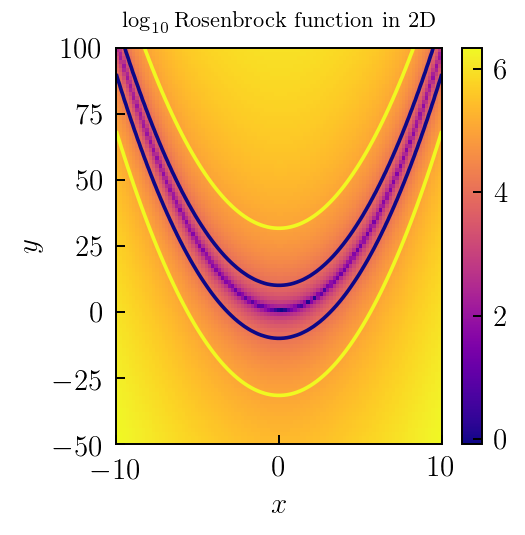

In [92]:
from codes.plot_utils import plot_color_map

# for chi^2 you probably won't need taking log10 of the function, as this was needed
# for Rosenbrock function, which varies within a wide range of values. 
levs = [np.log10(rg.min()+1e4), np.log10(rg.min()+1e5)]

plot_color_map(xg, yg, np.log10(rg), xlim=[xmin,xmax], ylim=[ymin,ymax], 
                   xlabel = r'$x$', ylabel = '$y$', cmap='plasma', colorbar=True, 
                   plot_title=r'$\rm \log_{10} Rosenbrock\ function\ in\ 2D$', contours=True, 
                   contcmap='plasma', levels = levs, 
                   figsize=3.0)


### using pickle model to transfer approximation array from hw2 notebook to this notebook

A tutorial on using this method can be found <a href="https://thepythonguru.com/pickling-objects-in-python/">here</a>.

The use of the method is illustrated below and as you will see is quite simple. 

Suppose I produced a spline object (class) <tt>spl2d_c</tt> or computed polynomial coefficients in the numpy vector <tt>ac</tt> in exercise 2 of hw 2. 

By spline object we mean here the instantiated spline class that you can now use for test points as, for example: 
<tt>spl2d_c(Om0t, OmLt)</tt> (your names for these can of course be different). 

We can save (or dump in pickle package terminology) these into binary file, as follows.

In [ ]:
import pickle 

f = open("data/d_L_polycoeffs", "wb")
pickle.dump(ac, f) # dump polynomial coefficients into the file
f.close()

f = open("data/d_L_spline", "wb")
pickle.dump(spl2d_c, f) # dump 2d spline object into the file
f.close()


We can then read them in a separate python code or notebook as follows. 

In [101]:
import pickle 

f = open("data/d_L_spline", "rb")
d_l_spl = pickle.load(f)
f.close()

f = open("data/d_L_polycoeffs", "rb")
ac = pickle.load(f)
f.close()

Once these are read, we can then use the spline or polynomial coefficients I recovered from the pickle file just as we would use them in they were produced in the same code or notebook, as shown below. 

Note that I use polynomial of order <tt>px, py = 13, 13</tt> because this is what I concluded produced optimal results in my exercise. Your results may be different. You also should use the best method you chose - there is no need to use both spline *and* polynomial approximation here, only one of them. 

In [116]:
Om0min, Om0max, nOm0 = 0, 1, 100
OmLmin, OmLmax, nOmL = 0, 1, 100

Om0 = np.linspace(Om0min, Om0max, nOm0)
OmL = np.linspace(OmLmin, OmLmax, nOmL)

# generate a 2d grid of x and y points
Om0g, OmLg = np.meshgrid(Om0, OmL, sparse=False, indexing='ij')

dLg = d_l_spl(Om0, OmL)

px, py = 13, 13
dLpg = np.polynomial.polynomial.polyval2d(Om0g, OmLg, ac.reshape((px+1,py+1)))


In the case of this exercise, you need to construct an array of 2D approximations of $\tilde{d}_L$ for each of the SNe  redshifts, as outlined above. It is this array that you can transfer here from another notebook where you arrange this calculation. 

Two warnings about using pickle: 

* When using binary format for pickle, the resulting pickled object may not be transferrable to another computer, which has different operating system and Python version. So it's best used for internal needs on your machine. 


* Reading pickled objects produced by someone else is dangerous, because it can execute malicious code upon reading. Thus, use only pickle files produced by you or by someone you trust. 